In [40]:
import pandas as pd

In [41]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%B-%Y')     #%B is jan  ,#b if january
data = pd.read_csv('Reliance.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)


In [42]:
#data2=data.loc['20190329':'20180101'].iloc[::-1]

In [43]:
data1=data.iloc[::-1]

In [44]:
data1

,Close Price
Date,
2009-01-01,313.4125
2009-01-02,320.9750
2009-01-05,341.4375
2009-01-06,342.0125
2009-01-07,299.2000
2009-01-09,287.7625
2009-01-12,274.8250
2009-01-13,270.2250
2009-01-14,294.5375


In [45]:
import matplotlib.pyplot as plt

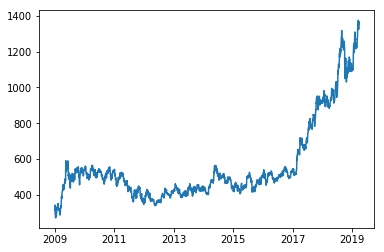

In [46]:
plt.plot(data1)

In [47]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    #plt.figure(figsize=[10,10])
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    #print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

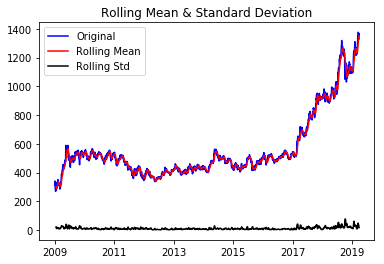

Results of Dickey-Fuller Test:
Test Statistic                    1.606167
p-value                           0.997876
#Lags Used                       20.000000
Number of Observations Used    2517.000000
Critical Value (1%)              -3.432951
Critical Value (5%)              -2.862689
Critical Value (10%)             -2.567382
dtype: float64


In [48]:
test_stationarity(data1['Close Price']) #if the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [49]:
#data1["Close Price"]

# we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

Aggregation – taking average for a time period like monthly/weekly averages

Smoothing – taking rolling averages

Polynomial Fitting – fit a regression model

In [50]:
import numpy as np
log_ts=np.log(data1["Close Price"])       #log better then normal ,we can take exp,square root alse


In [51]:
#plt.plot(log_ts)
#aggregation

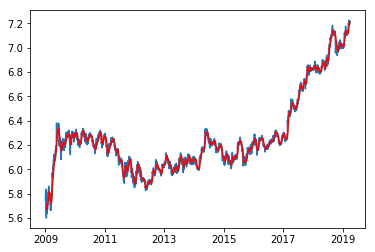

In [52]:
rolmean = log_ts.rolling(12).mean()
plt.plot(log_ts)
plt.plot(rolmean,color='red')


In [53]:
ts_log_moving_avg_diff = log_ts - rolmean
#ts_log_moving_avg_diff


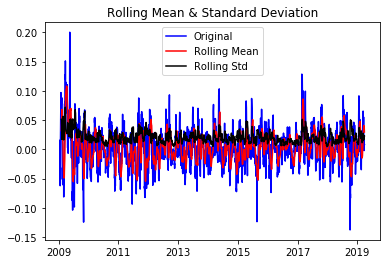

Results of Dickey-Fuller Test:
Test Statistic                -1.224955e+01
p-value                        9.609720e-23
#Lags Used                     1.500000e+01
Number of Observations Used    2.511000e+03
Critical Value (1%)           -3.432957e+00
Critical Value (5%)           -2.862692e+00
Critical Value (10%)          -2.567383e+00
dtype: float64


In [54]:
ts_log_moving_avg_diff.dropna(inplace=True)        #remove nan value
test_stationarity(ts_log_moving_avg_diff)

#
The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

Differencing – taking the differece with a particular time lag

Decomposition – modeling both trend and seasonality and removing them from the model.

In [55]:
"""logg=np.log(data2)            #sample of main data
ts_log_diff = logg - logg.shift()
plt.plot(ts_log_diff)"""

'logg=np.log(data2)            #sample of main data\nts_log_diff = logg - logg.shift()\nplt.plot(ts_log_diff)'

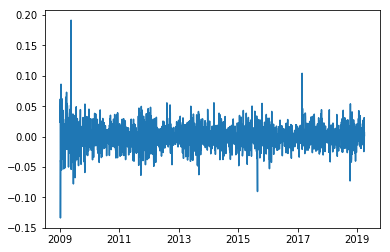

In [56]:
ts_log_diff = log_ts - log_ts.shift()
plt.plot(ts_log_diff)               #This appears to have reduced trend considerably. Lets verify using our plots in fxn above

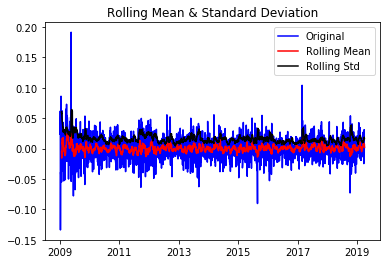

Results of Dickey-Fuller Test:
Test Statistic                  -48.039318
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2536.000000
Critical Value (1%)              -3.432931
Critical Value (5%)              -2.862680
Critical Value (10%)             -2.567377
dtype: float64


In [57]:
ts_log_diff.dropna(inplace=True)                             #defferencing better then average mean(moving mean)
test_stationarity(ts_log_diff)

In [58]:
#decomposing    modeling both trend and seasonality and removing them from the model.

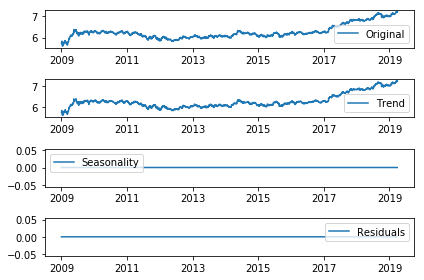

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_ts,freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(log_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [120]:
from statsmodels.tsa.arima_model import ARIMA

In [121]:
#AR

G:\Newfolder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\Newfolder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\Newfolder\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
G:\Newfolder\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimen

Text(0.5,1,'RSS: 0.8172')

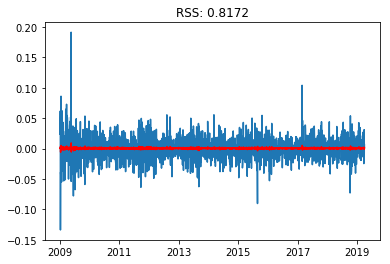

In [133]:
model = ARIMA(log_ts, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  

plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

G:\Newfolder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\Newfolder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.8173')

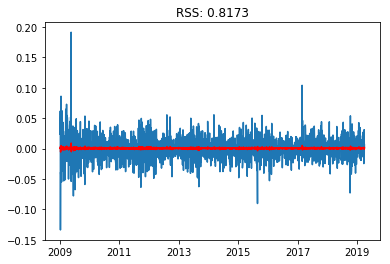

In [131]:
#moving average  (MA)
model = ARIMA(log_ts, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [125]:
#arima

G:\Newfolder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\Newfolder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.8142')

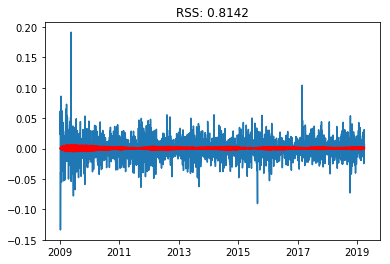

In [159]:
model = ARIMA(log_ts, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [160]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2009-01-02    0.000578
2009-01-05    0.000753
2009-01-06    0.000717
2009-01-07   -0.000518
2009-01-09   -0.000859
dtype: float64

In [183]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()


In [184]:
predictions_ARIMA_log = pd.Series(log_ts.ix[0], index=log_ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

G:\Newfolder\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2009-01-01    5.747520
2009-01-02    5.748099
2009-01-05    5.748851
2009-01-06    5.749569
2009-01-07    5.749051
dtype: float64